In [ ]:
##referencia codigo original: https://github.com/mythrex/PCA-vs-LDA
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
np.set_printoptions(precision=4)
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [ ]:
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.Categorical.from_codes(wine.target, wine.target_names)

In [ ]:
df = X.join(pd.Series(y, name='class'))
print(X.shape, y.shape)
df.head()

(178, 13) (178,)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,class_0


In [ ]:
df['class'].describe()

count         178
unique          3
top       class_1
freq           71
Name: class, dtype: object

# LDA

1. Computar la distancia entre clases con matrices
2. Calcule los vectores propios y los valores propios correspondientes para las matrices de dispersión
3. Ordene los valores propios y seleccione los k superiores
4. Cree una nueva matriz que contenga vectores propios que correspondan a los valores propios k
5. Obtenga las nuevas características (es decir, componentes LDA) tomando el producto cruzado de los datos y la matriz del paso 4

## 1. Computar la distancia entre clases con matrices

### Distancia interclase matrix

Matriz de dispersión de cada clase.

$ S_w = \sum_{i=1}^{C} {S_i} $ , donde `c`: número total de clases

$ S_i = \sum_{x=1}^{m} {(x-u_i)(x-u_i)'} $, $ S_i $ es la disperción de esa clase

In [ ]:
X_nuevo=[11.23,2.03654,2.35, 18.32465.......]

In [ ]:
class_feature_means = pd.DataFrame(columns=wine.target_names)
for c, rows in df.groupby('class'):
    class_feature_means[c] = rows.mean()
class_feature_means

,class_0,class_1,class_2
alcohol,13.744746,12.278732,13.153750
malic_acid,2.010678,1.932676,3.333750
ash,2.455593,2.244789,2.437083
alcalinity_of_ash,17.037288,20.238028,21.416667
magnesium,106.338983,94.549296,99.312500
total_phenols,2.840169,2.258873,1.678750
flavanoids,2.982373,2.080845,0.781458
nonflavanoid_phenols,0.290000,0.363662,0.447500
proanthocyanins,1.899322,1.630282,1.153542
color_intensity,5.528305,3.086620,7.396250


In [ ]:
m, n = X.shape
within_class_matrix = np.zeros((n, n))

for c, rows in df.groupby('class'):
    rows = rows.drop(['class'], axis=1)
    s = np.zeros((n, n))
    for i, row in rows.iterrows():
        mean = class_feature_means[c].values.reshape(-1, 1)
        x = row.values.reshape(-1, 1)
        s += (x-mean) @ ((x-mean).T)
    within_class_matrix += s

### Matriz de distancia intra clases (Densidad)

\begin{equation}
S_B = \sum_{i=1}^c {N_i * (m_i - m) * (m_i - m).T}
\end{equation}

$ N_i $: Nro de datos en la clase

$ m_i $: varianza de la clase

`m`: media de las características


## 2.Calcule los vectores propios y los valores propios correspondientes para las matrices de dispersión Y.. (DISTANCIA INTERCLASE, DIspersion)

In [ ]:
df.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


alcohol                          13.000618
malic_acid                        2.336348
ash                               2.366517
alcalinity_of_ash                19.494944
magnesium                        99.741573
total_phenols                     2.295112
flavanoids                        2.029270
nonflavanoid_phenols              0.361854
proanthocyanins                   1.590899
color_intensity                   5.058090
hue                               0.957449
od280/od315_of_diluted_wines      2.611685
proline                         746.893258
dtype: float64

In [ ]:
between_class_matrix = np.zeros((n,n))
features_mean = df.mean()

for c in class_feature_means:
    n_i = len(df[df['class'] == c])
    m_i = class_feature_means[c].values.reshape(-1, 1)
    m = features_mean.values.reshape(-1, 1)
    between_class_matrix += n_i * (m_i - m) @ (m_i - m).T

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


## 3. Ordene los valores propios y seleccione los k superiores

In [ ]:
eigen_values, eigen_vectors = np.linalg.eig(np.linalg.inv(within_class_matrix).dot(between_class_matrix))

### 4. Cree una nueva matriz que contenga vectores propios que correspondan a los valores propios k


\begin{equation}
S_w^{-1} * S_B
\end{equation}

In [ ]:
pairs = [(np.abs(eigen_values[i]), eigen_vectors[:,i]) for i in range(len(eigen_values))]
pairs = sorted(pairs, key=lambda x: x[0], reverse=True)
for pair in pairs:
    print(pair[0])

9.081739435042476
4.1284690456394895
8.881784197001252e-16
6.624789399193902e-16
6.624789399193902e-16
6.587363342943511e-16
6.587363342943511e-16
6.464798015314165e-16
3.533332539018509e-16
1.6720552804455332e-16
1.1857832756487055e-16
1.1857832756487055e-16
7.960343451409404e-17


## 5. Obtenga las nuevas características (es decir, componentes LDA) tomando el producto cruzado de los datos y la matriz del paso 4

In [ ]:
eigen_value_sums = sum(eigen_values)
print('Explained Variance')
for i, pair in enumerate(pairs):
    print('Eigenvector {}: {}'.format(i, (pair[0]/eigen_value_sums).real))

Explained Variance
Eigenvector 0: 0.6874788878860782
Eigenvector 1: 0.3125211121139217
Eigenvector 2: 6.629318613355477e-17
Eigenvector 3: 5.2967341647222384e-17
Eigenvector 4: 4.971576256952484e-17
Eigenvector 5: 4.971576256952484e-17
Eigenvector 6: 2.1954933320029802e-17
Eigenvector 7: 1.8528356116767136e-17
Eigenvector 8: 1.8528356116767136e-17
Eigenvector 9: 1.6615962906186698e-17
Eigenvector 10: 3.1300819286174307e-18
Eigenvector 11: 2.9901549703892255e-18
Eigenvector 12: 0.0


In [ ]:
w_matrix = np.hstack((pairs[0][1].reshape(13,1), pairs[1][1].reshape(13,1))).real

array([[-1.4368e-01, -2.5445e-01],
       [ 5.8860e-02, -8.9130e-02],
       [-1.3146e-01, -6.8467e-01],
       [ 5.5136e-02,  4.2724e-02],
       [-7.7060e-04,  1.3506e-04],
       [ 2.2014e-01,  9.4018e-03],
       [-5.9168e-01,  1.4360e-01],
       [-5.3278e-01,  4.7602e-01],
       [ 4.7761e-02,  8.9628e-02],
       [ 1.2646e-01, -7.3909e-02],
       [-2.9137e-01,  4.4236e-01],
       [-4.1230e-01, -1.4939e-02],
       [-9.5856e-04, -8.3269e-04]])

In [ ]:
X_lda = np.array(X.dot(w_matrix)) #X*(MU)+B=0

In [ ]:
X_lda_df = pd.DataFrame(X_lda, columns=['lda1', 'lda2'])
X_lda_df['class'] = df['class']

# Plot  LDA

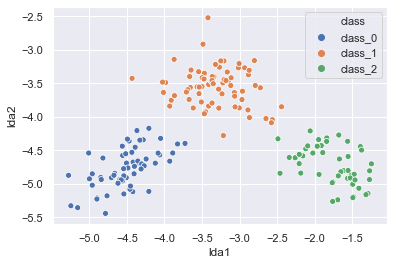

In [ ]:
sns.scatterplot(x='lda1', y='lda2', hue='class', data=X_lda_df)

Considerando que, LDA está reduciendo las dimensiones al minimizar la `varianza entre clases` ($ S_W $) y maximizar la `varianza dentro de la clase` ($ S_B $)